In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from iml import IML
from iml.interpolate import *
from iml.feature import *

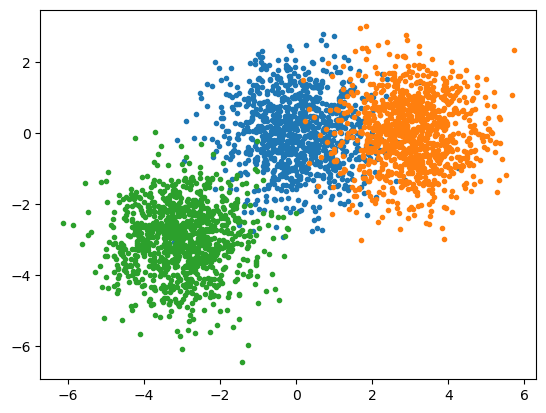

In [4]:
# x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
pts = 1000
x = np.random.randn(pts, 2)
y = np.random.randn(pts, 2) + [3, 0]
z = np.random.randn(pts, 2) + [-3, -3]
rs = ProjectAndSort(x.shape)
plt.plot(*x.T, ls='', marker='.')
plt.plot(*y.T, ls='', marker='.')
plt.plot(*z.T, ls='', marker='.')

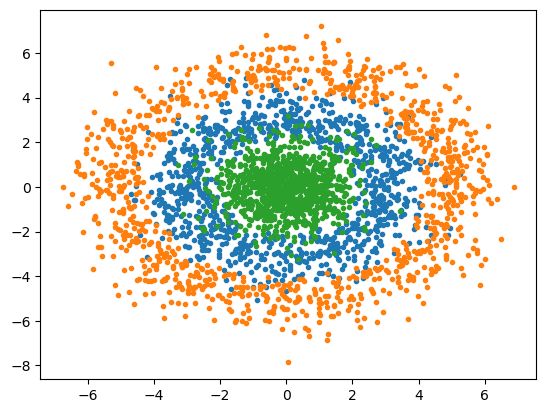

In [5]:
# x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
pts = 1000
x = np.random.randn(pts, 2)
xn = np.linalg.norm(x, axis=1, keepdims=True)
x = x/xn*(2+xn) 
y = np.random.randn(pts, 2)
yn = np.linalg.norm(y, axis=1, keepdims=True)
y = y/yn*(4+yn) 
z = np.random.randn(pts, 2)
rs = ProjectAndSort(x.shape)
plt.plot(*x.T, ls='', marker='.')
plt.plot(*y.T, ls='', marker='.')
plt.plot(*z.T, ls='', marker='.')

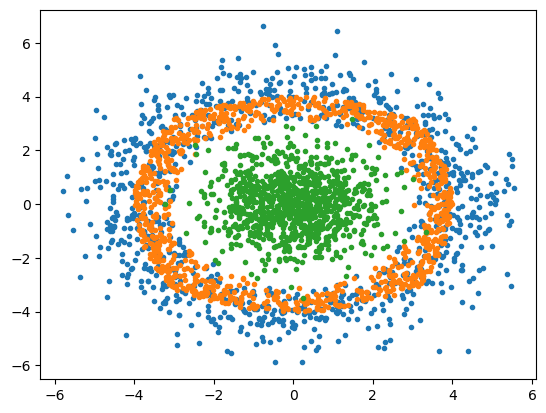

In [6]:
# x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
pts = 1000
x = np.random.randn(pts, 2)
xn = np.linalg.norm(x, axis=1, keepdims=True)
x = x/xn*(3+xn) 
y = np.random.rand(pts, 2)*2-1
yn = np.linalg.norm(y, axis=1, keepdims=True)
y = y/yn*(3+yn) 
z = np.random.randn(pts, 2)
rs = ProjectAndSort(x.shape)
plt.plot(*x.T, ls='', marker='.')
plt.plot(*y.T, ls='', marker='.')
plt.plot(*z.T, ls='', marker='.')

In [7]:
np.linalg.norm(rs(x) - rs(y)),\
np.linalg.norm(rs(x) - rs(z)),\
np.linalg.norm(rs(z) - rs(y))

(0.4362870228326474, 2.0878840941057843, 1.7424161514984835)

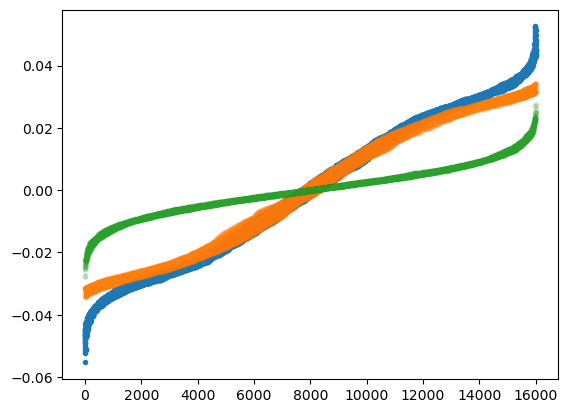

In [8]:
plt.plot(rs(x), ls='', marker='.')
plt.plot(rs(y), ls='', marker='.', alpha=0.1)
plt.plot(rs(z), ls='', marker='.', alpha=0.1)

In [16]:
# iml = IML(2)
from iml.nnsearch import *
iml = IML(index=IndexFast(2))

reset


In [17]:
iml.add([0,0], 1.)

add source=[0, 0], target=1.0


0

In [18]:
for i in range(19):
    v = np.random.randn(2)
    print(v,i)
    iml.add(v, float(i))

[-2.1654036   1.31423758] 0
add source=array([-2.1654036 ,  1.31423758]), target=0.0
[-1.58445985 -0.91244416] 1
add source=array([-1.58445985, -0.91244416]), target=1.0
[-1.6545623  -0.51944458] 2
add source=array([-1.6545623 , -0.51944458]), target=2.0
[-1.46798191 -2.45693274] 3
add source=array([-1.46798191, -2.45693274]), target=3.0
[-1.27084749 -1.12602727] 4
add source=array([-1.27084749, -1.12602727]), target=4.0
[ 0.47432129 -0.93236343] 5
add source=array([ 0.47432129, -0.93236343]), target=5.0
[-0.50592341 -0.80228722] 6
add source=array([-0.50592341, -0.80228722]), target=6.0
[0.73060951 0.1930888 ] 7
add source=array([0.73060951, 0.1930888 ]), target=7.0
[0.49172791 0.53837664] 8
add source=array([0.49172791, 0.53837664]), target=8.0
[ 1.49355485 -2.23001023] 9
add source=array([ 1.49355485, -2.23001023]), target=9.0
[0.70219315 0.59132504] 10
add source=array([0.70219315, 0.59132504]), target=10.0
[-0.18130418 -2.35466733] 11
add source=array([-0.18130418, -2.35466733]), 

In [19]:
iml.pairs

{0: IOPair(input=[0, 0], output=1.0),
 1: IOPair(input=array([-2.1654036 ,  1.31423758]), output=0.0),
 2: IOPair(input=array([-1.58445985, -0.91244416]), output=1.0),
 3: IOPair(input=array([-1.6545623 , -0.51944458]), output=2.0),
 4: IOPair(input=array([-1.46798191, -2.45693274]), output=3.0),
 5: IOPair(input=array([-1.27084749, -1.12602727]), output=4.0),
 6: IOPair(input=array([ 0.47432129, -0.93236343]), output=5.0),
 7: IOPair(input=array([-0.50592341, -0.80228722]), output=6.0),
 8: IOPair(input=array([0.73060951, 0.1930888 ]), output=7.0),
 9: IOPair(input=array([0.49172791, 0.53837664]), output=8.0),
 10: IOPair(input=array([ 1.49355485, -2.23001023]), output=9.0),
 11: IOPair(input=array([0.70219315, 0.59132504]), output=10.0),
 12: IOPair(input=array([-0.18130418, -2.35466733]), output=11.0),
 13: IOPair(input=array([ 1.35779602, -0.16342509]), output=12.0),
 14: IOPair(input=array([-1.66304244, -1.32711007]), output=13.0),
 15: IOPair(input=array([-0.17691072,  0.61305337

In [20]:
def plot_cmap(**kw):
    fig, ax = plt.subplots(figsize=(10,10))

    l,n = 4, 128
    c = np.linspace(-l, l, n)
    r = np.empty(c.shape*2)
    for i,y in enumerate(c):
        for j,x in enumerate(c):
            r[i,j] = iml.map([x,y], **kw)

    plt.imshow(r, cmap='RdBu')
    src, tgt = zip(*iml.pairs.values())
    plt.scatter(*(np.array(list(src)).T+l)*n/l/2, marker='.', c='black')

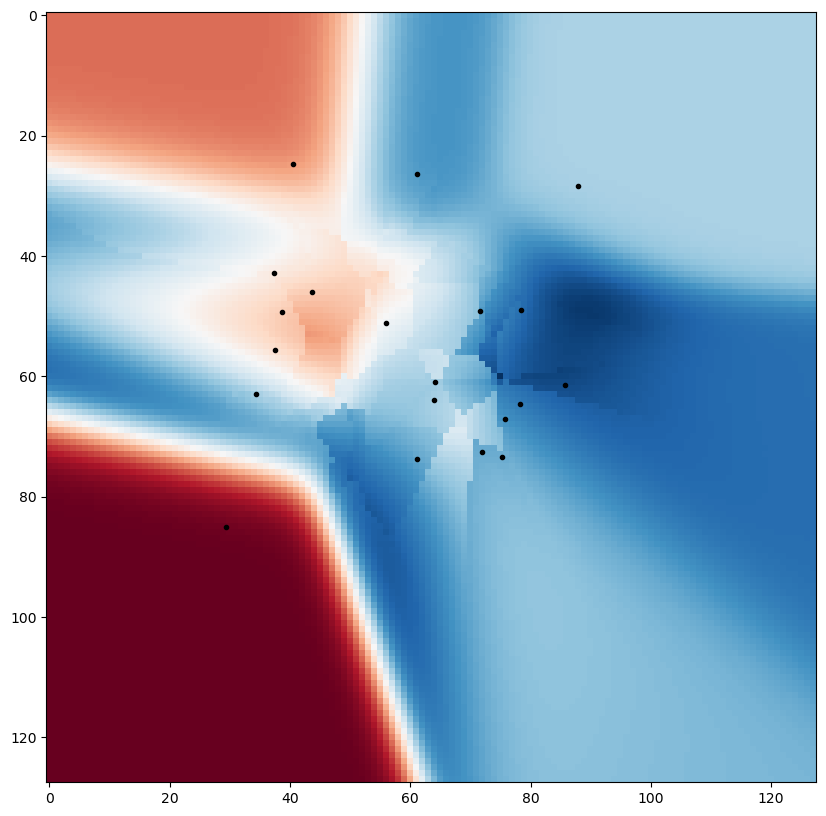

In [21]:
iml.interpolate=Softmax()
plot_cmap(k=5, temp=0.5)

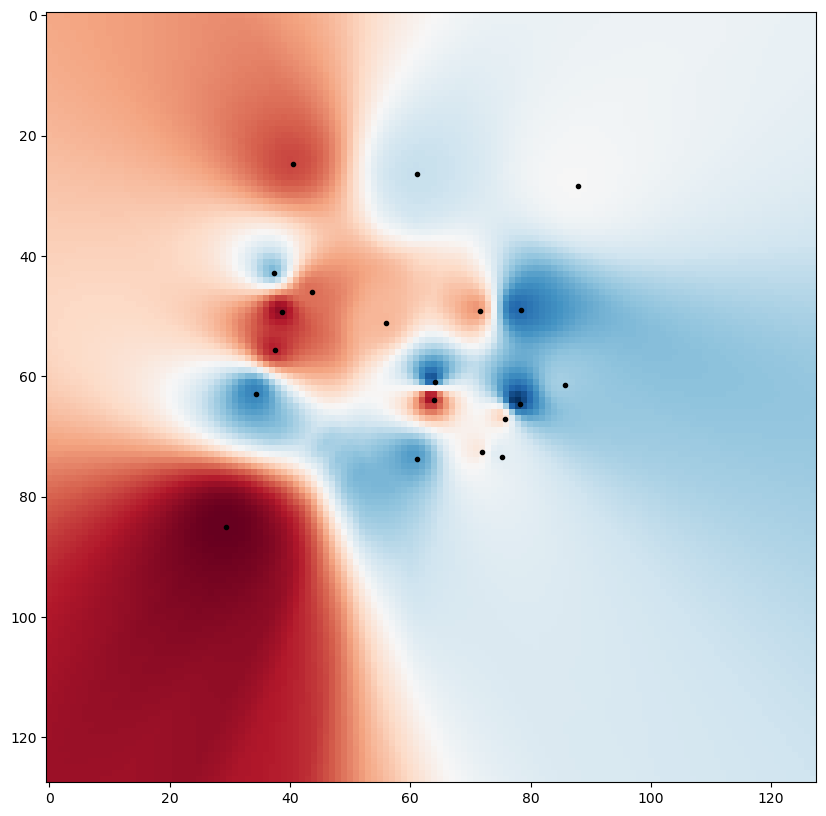

In [22]:
iml.interpolate=Smooth()
plot_cmap(k=10)

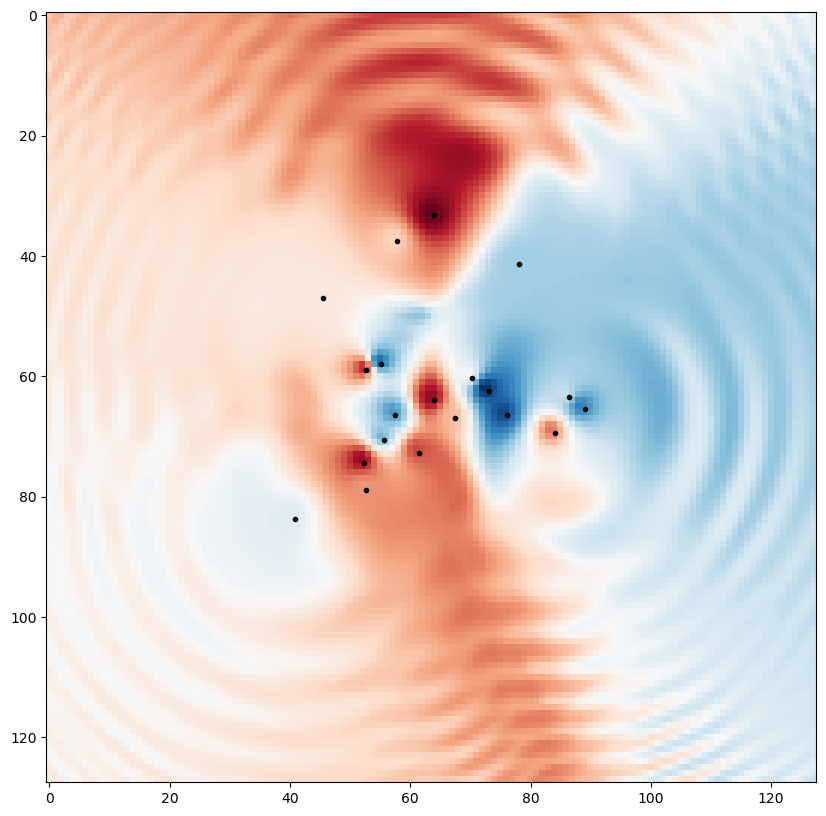

In [84]:
iml.interpolate=Ripple()
plot_cmap(k=10, ripple_depth=1, ripple=1)

In [89]:
# RGB
iml = IML(2)
for _ in range(9):
    v = np.random.randn(2)
    c = np.random.rand(3)
    print(v,c)
    iml.add(v, c)

reset
[-0.73341192 -2.74312749] [0.68439825 0.3364722  0.54168181]
add source=array([-0.73341192, -2.74312749]), target=array([0.68439825, 0.3364722 , 0.54168181])
[ 0.78626915 -0.37786834] [0.24497641 0.21877078 0.69281532]
add source=array([ 0.78626915, -0.37786834]), target=array([0.24497641, 0.21877078, 0.69281532])
[-1.42319973  1.71539076] [0.195827   0.05546098 0.840081  ]
add source=array([-1.42319973,  1.71539076]), target=array([0.195827  , 0.05546098, 0.840081  ])
[0.53356465 0.28211786] [0.66700709 0.09818626 0.24609855]
add source=array([0.53356465, 0.28211786]), target=array([0.66700709, 0.09818626, 0.24609855])
[-2.33369275 -1.49682633] [0.75714043 0.16443694 0.66231924]
add source=array([-2.33369275, -1.49682633]), target=array([0.75714043, 0.16443694, 0.66231924])
[-0.35554435 -0.37313025] [0.53340359 0.5083154  0.70837975]
add source=array([-0.35554435, -0.37313025]), target=array([0.53340359, 0.5083154 , 0.70837975])
[ 0.58398606 -2.72402648] [0.40953261 0.66656767 0

In [90]:
def plot_rgb(**kw):
    fig, ax = plt.subplots(figsize=(10,10))

    l,n = 4, 128
    c = np.linspace(-l, l, n)
    r = np.empty(c.shape*2 + (3,))
    for i,y in enumerate(c):
        for j,x in enumerate(c):
            r[i,j] = iml.map([x,y], **kw)

    plt.imshow(r)
    src, tgt = zip(*iml.pairs.values())
    plt.scatter(*(np.array(list(src)).T+l)*n/l/2, marker='.', c='black')

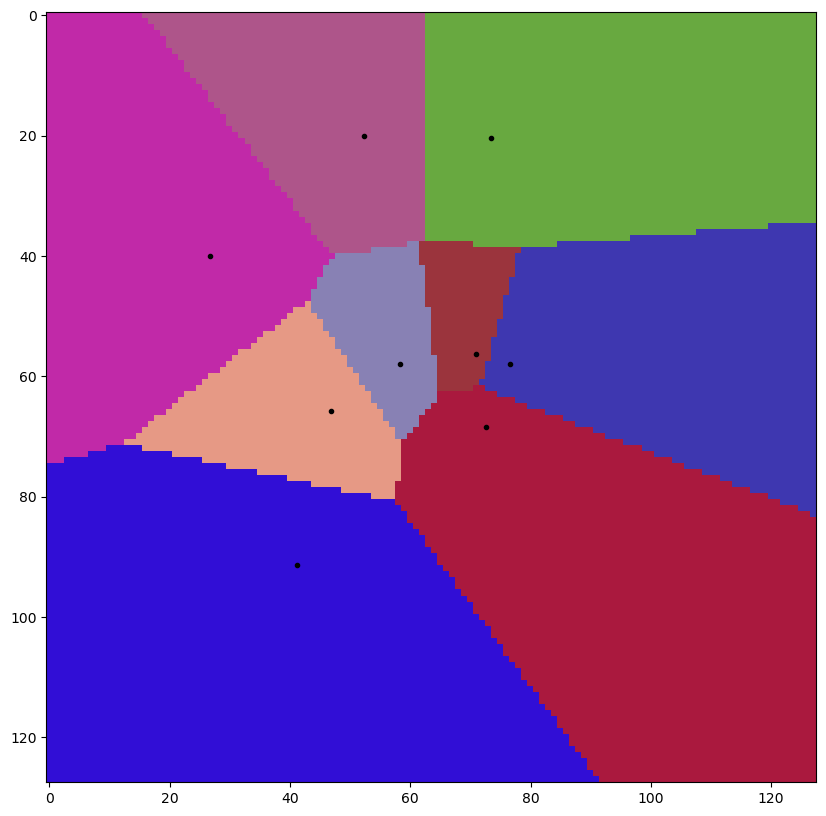

In [91]:
iml.interpolate=Mean()
plot_rgb(k=1)

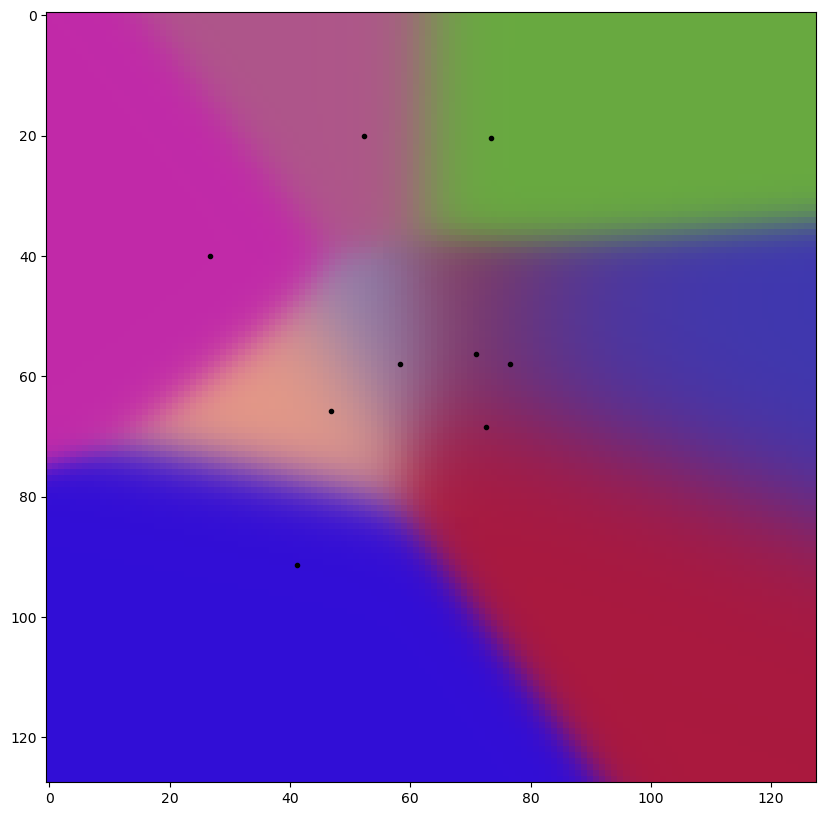

In [92]:
iml.interpolate=Softmax()
plot_rgb(k=5, temp=0.5)

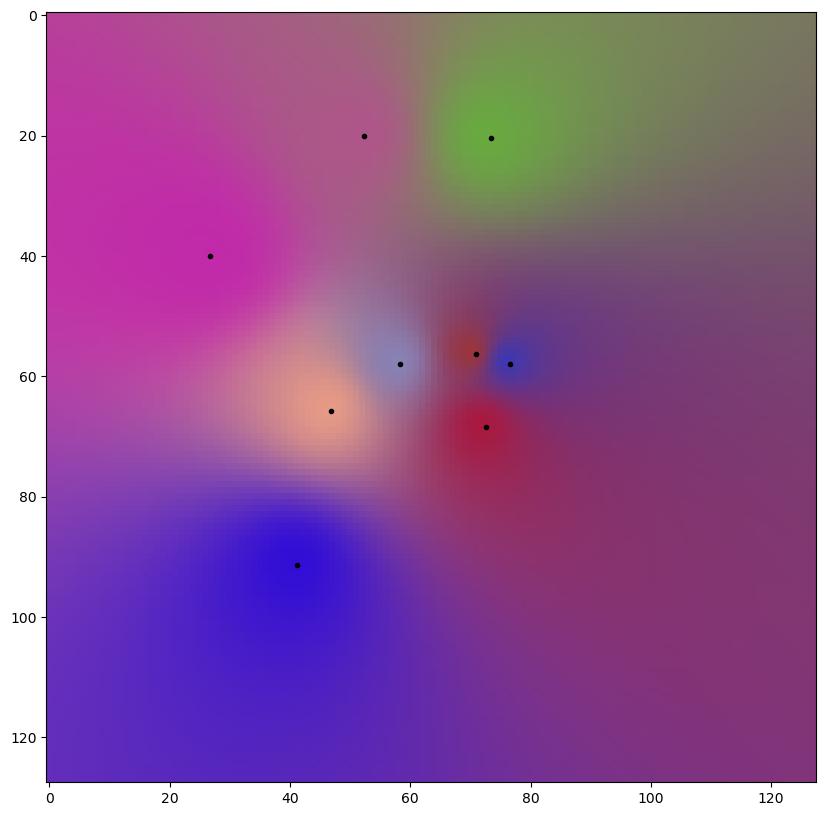

In [93]:
iml.interpolate=Smooth()
plot_rgb(k=10)

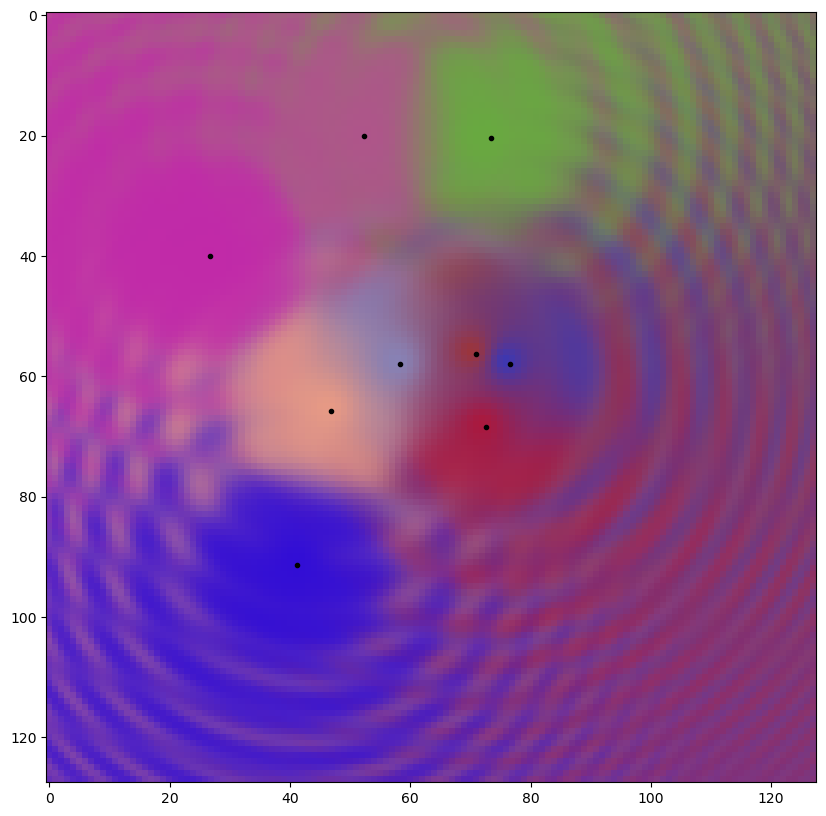

In [94]:
iml.interpolate=Ripple()
plot_rgb(k=10, ripple_depth=1, ripple=1)

In [95]:
# high dimensional input
d = 8
iml = IML(d)
for _ in range(9):
    v = np.random.randn(d)
    c = np.random.rand(3)
    print(v,c)
    iml.add(v, c)

reset
[-0.37958954 -1.48712613  0.36338884 -1.6547096   1.78793232  1.00062587
 -0.11045885  0.30167103] [0.71326846 0.92295988 0.51155392]
add source=array([-0.37958954, -1.48712613,  0.36338884, -1.6547096 ,  1.78793232,
        1.00062587, -0.11045885,  0.30167103]), target=array([0.71326846, 0.92295988, 0.51155392])
[-0.66163169  0.04981536  0.02302383  0.73203967  0.46595422  0.71867078
 -0.18189177  1.03645441] [0.58137883 0.48112118 0.92644821]
add source=array([-0.66163169,  0.04981536,  0.02302383,  0.73203967,  0.46595422,
        0.71867078, -0.18189177,  1.03645441]), target=array([0.58137883, 0.48112118, 0.92644821])
[-0.57497665 -0.03735108  0.76024385  0.87516174 -0.48224261 -0.03333115
  0.18039225  1.23506968] [0.93939781 0.81004241 0.15281095]
add source=array([-0.57497665, -0.03735108,  0.76024385,  0.87516174, -0.48224261,
       -0.03333115,  0.18039225,  1.23506968]), target=array([0.93939781, 0.81004241, 0.15281095])
[ 2.28825528 -0.64557031  0.00612175 -0.244760

In [85]:
def plot_slice(**kw):
    fig, ax = plt.subplots(figsize=(10,10))

    l,n = 4, 128
    c = np.linspace(-l, l, n)
    r = np.empty(c.shape*2 + (3,))
    for i,y in enumerate(c):
        for j,x in enumerate(c):
            r[i,j] = iml.map([x,y]+[0]*(d-2), **kw)

    plt.imshow(r)
    src, tgt = zip(*iml.pairs.values())
    src = np.array(list(src))
    proj, rest = src[:,:2], src[:,2:]
    dist = np.abs(rest).sum(axis=1)
    print(dist)
    
    plt.scatter(*(proj.T+l)*n/l/2, marker='.', c='black', alpha = 1/(1+3*dist))

[6.21542667 4.35610149 4.51905739 5.49532772 3.96961387 3.74679679
 2.76209858 6.92837409 6.75197036]


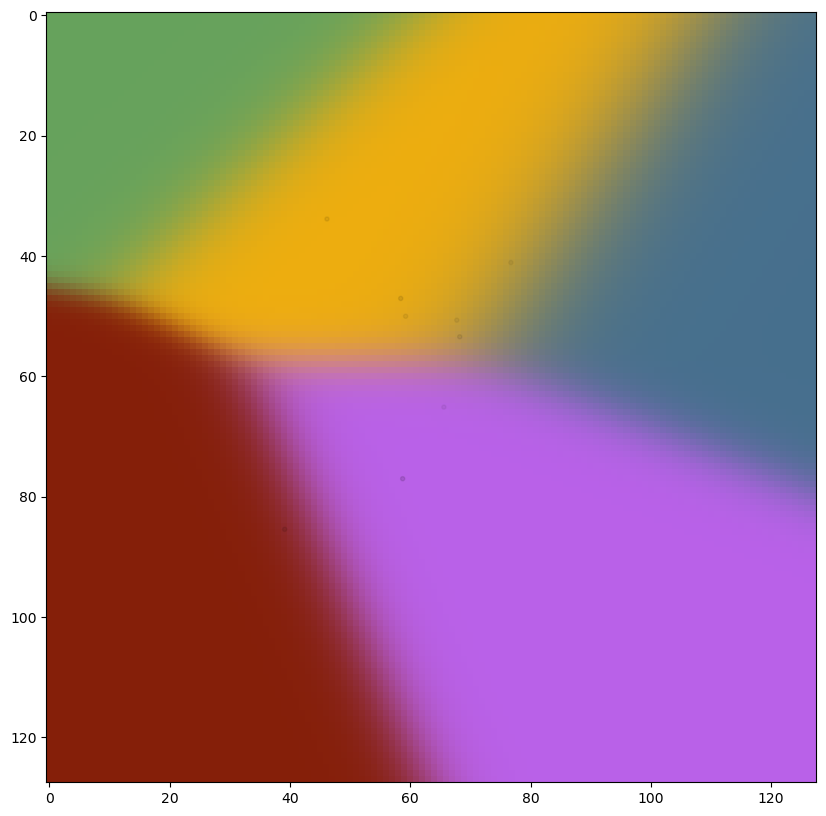

In [86]:
iml.interpolate=Softmax()
plot_slice(k=5, temp=0.5)

[6.21542667 4.35610149 4.51905739 5.49532772 3.96961387 3.74679679
 2.76209858 6.92837409 6.75197036]


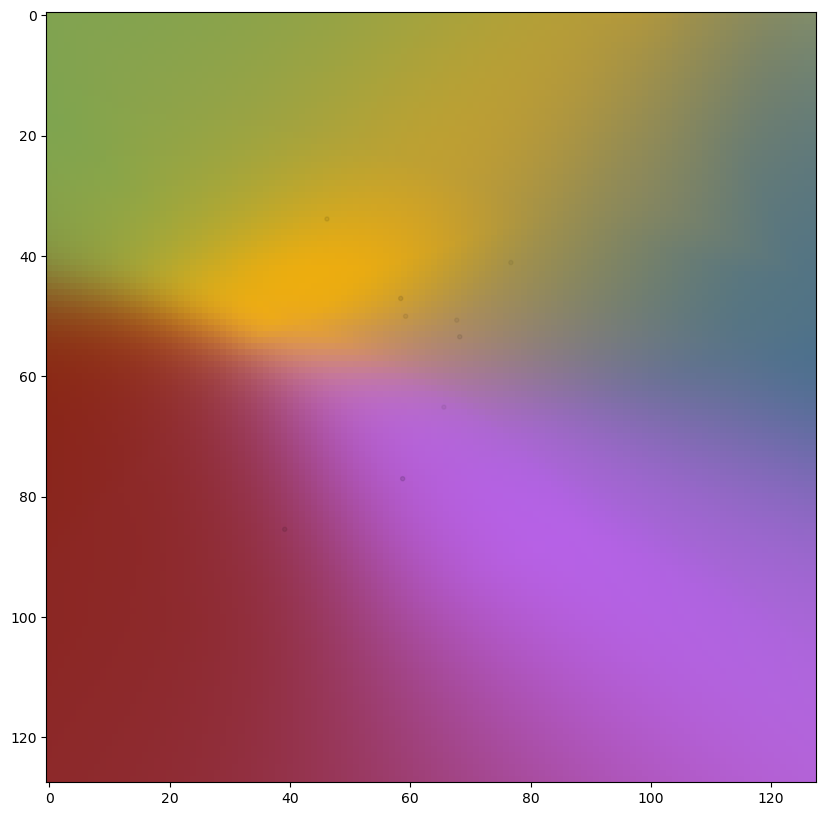

In [87]:
iml.interpolate=Smooth()
plot_slice(k=5)

[6.21542667 4.35610149 4.51905739 5.49532772 3.96961387 3.74679679
 2.76209858 6.92837409 6.75197036]


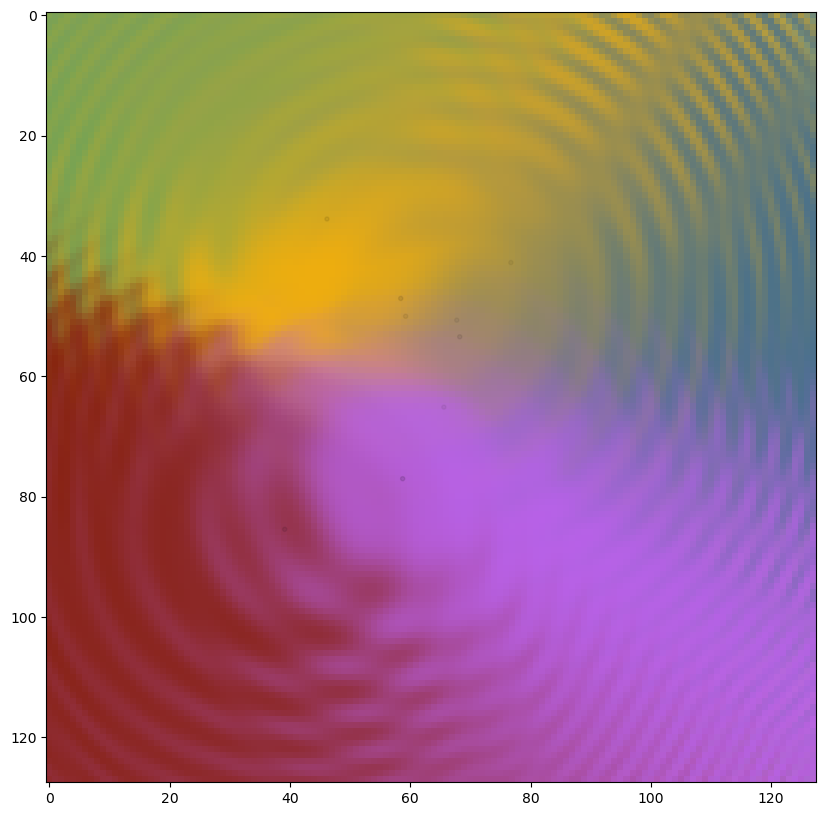

In [88]:
iml.interpolate=Ripple()
plot_slice(k=5)